In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
file_path = "large_synthetic_agri_waste_energy.csv.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Rename columns for easier use
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Base carbon content by waste type
waste_baseline = {
    'Orange Peel': 65, 'Rice Husk': 72, 'Banana Peel': 68,
    'Wheat Straw': 66, 'Corn Cob': 70, 'Coconut Shell': 78
}

# Simulate carbon_content
df['carbon_content'] = df.apply(
    lambda row: waste_baseline.get(row['waste_type'], 65) + 0.8 * row['carbonization_time_(hrs)'] + np.random.normal(0, 1.5),
    axis=1
)

# Simulate stability_index
df['stability_index'] = (
    60 + 3 * df['voltage_(v)'] + 0.05 * df['discharge_time_(s)'] + np.random.normal(0, 2, size=len(df))
)

# Simulate degradation_rate
df['degradation_rate'] = (
    5 - 0.03 * df['discharge_time_(s)'] - 0.02 * df['stability_index'] + np.random.normal(0, 0.2, size=len(df))
)
df['degradation_rate'] = df['degradation_rate'].clip(lower=0)


In [4]:
# Encode categorical columns
df_encoded = pd.get_dummies(df, columns=['waste_type', 'electrolyte'], drop_first=True)

# Select features and target
features = df_encoded.drop(columns=['carbon_content', 'stability_index', 'degradation_rate'])
targets = df_encoded[['carbon_content', 'stability_index', 'degradation_rate']]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [6]:
# Train separate models for each target
models = {}
predictions = {}
metrics = {}

for target in targets.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[target])
    y_pred = model.predict(X_test)
    
    models[target] = model
    predictions[target] = y_pred
    metrics[target] = {
        "MAE": mean_absolute_error(y_test[target], y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test[target], y_pred)),
        "R2": r2_score(y_test[target], y_pred)
    }


In [7]:
# Print model performance
for target, result in metrics.items():
    print(f"\n📊 Performance for {target.upper()}:")
    print(f"MAE:  {result['MAE']:.2f}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"R²:   {result['R2']:.2f}")



📊 Performance for CARBON_CONTENT:
MAE:  1.26
RMSE: 1.59
R²:   0.91

📊 Performance for STABILITY_INDEX:
MAE:  1.66
RMSE: 2.08
R²:   0.60

📊 Performance for DEGRADATION_RATE:
MAE:  0.04
RMSE: 0.10
R²:   0.91


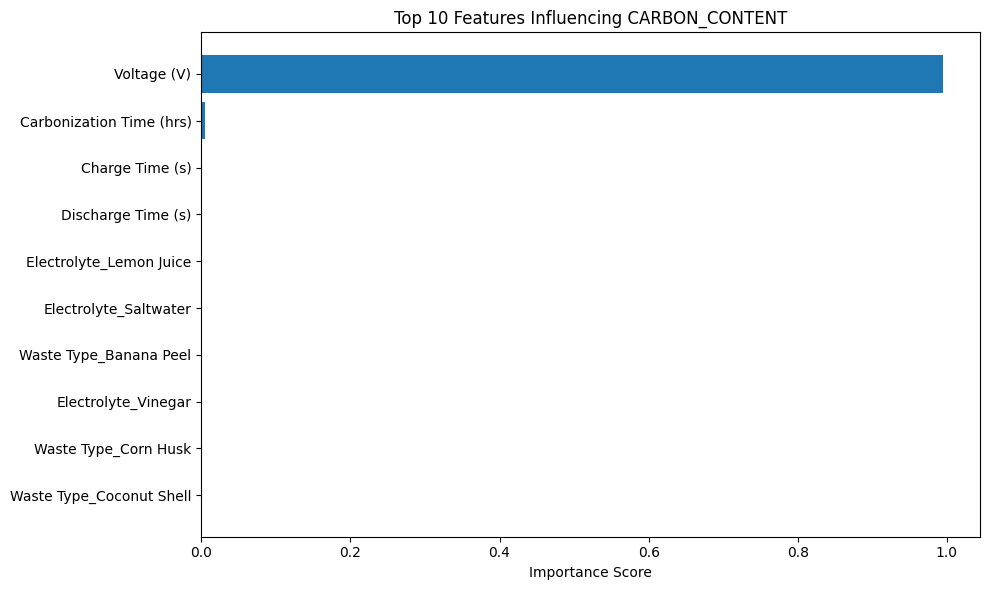

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()


# Example synthetic targets (approximations)
df["CARBON_CONTENT"] = df["Carbonization Time (hrs)"] * 0.3 + (df["Voltage (V)"] * 10)
df["STABILITY_INDEX"] = df["Charge Time (s)"] / (df["Discharge Time (s)"] + 1)
df["DEGRADATION_RATE"] = 1 / (df["Discharge Time (s)"] + 1)
X = df.drop(columns=["CARBON_CONTENT", "STABILITY_INDEX", "DEGRADATION_RATE"])
y = df["CARBON_CONTENT"]
X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
top_features = importance_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.xlabel("Importance Score")
plt.title("Top 10 Features Influencing CARBON_CONTENT")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [9]:
# Create a synthetic performance score
df["PERFORMANCE_SCORE"] = (df["Voltage (V)"] * 0.5) + \
                          (df["Discharge Time (s)"] * 0.3) - \
                          (df["Charge Time (s)"] * 0.2)


In [10]:
# Group by waste type to calculate mean performance
waste_performance = df.groupby("Waste Type")["PERFORMANCE_SCORE"].mean().sort_values(ascending=False)

print("Best Waste Types for Energy Storage:")
print(waste_performance)


Best Waste Types for Energy Storage:
Waste Type
Corn Husk        10.134416
Coconut Shell    10.067292
Rice Husk        10.050079
Orange Peel       9.947719
Banana Peel       9.816385
Name: PERFORMANCE_SCORE, dtype: float64


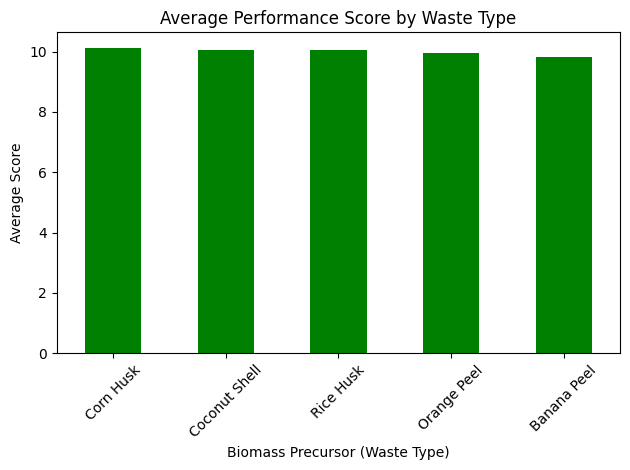

In [11]:
import matplotlib.pyplot as plt

waste_performance.plot(kind="bar", color="green")
plt.title("Average Performance Score by Waste Type")
plt.ylabel("Average Score")
plt.xlabel("Biomass Precursor (Waste Type)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")

# Select relevant features
features = ['Carbonization Time (hrs)', 'Voltage (V)', 'Charge Time (s)', 'Discharge Time (s)']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


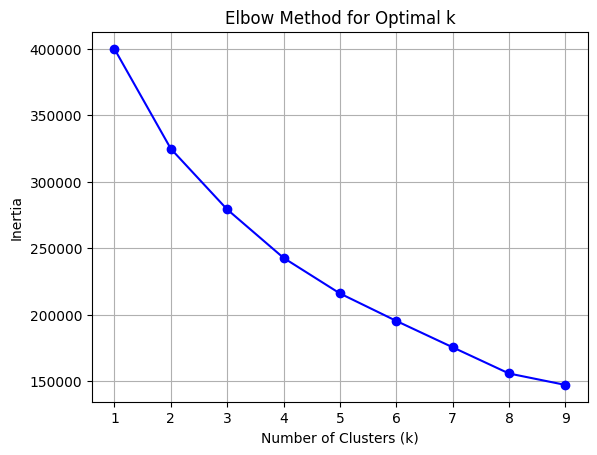

In [13]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [14]:
# Assume best k is 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster distribution
print(df['Cluster'].value_counts())


Cluster
1    37031
2    34248
0    28721
Name: count, dtype: int64


In [15]:
# Mean values for each cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

# Optional: Add Waste Type and group by Cluster
waste_by_cluster = df.groupby(['Cluster', 'Waste Type']).size().unstack(fill_value=0)
print(waste_by_cluster)


         Carbonization Time (hrs)  Voltage (V)  Charge Time (s)  \
Cluster                                                           
0                        2.278194     1.000659       226.658682   
1                        1.398409     1.001956       139.152899   
2                        0.959180     0.995835       241.548120   

         Discharge Time (s)  
Cluster                      
0                163.558442  
1                166.036942  
2                163.859116  
Waste Type  Banana Peel  Coconut Shell  Corn Husk  Orange Peel  Rice Husk
Cluster                                                                  
0                  5724           5742       5655         5854       5746
1                  7391           7438       7333         7487       7382
2                  6881           6923       6737         6865       6842


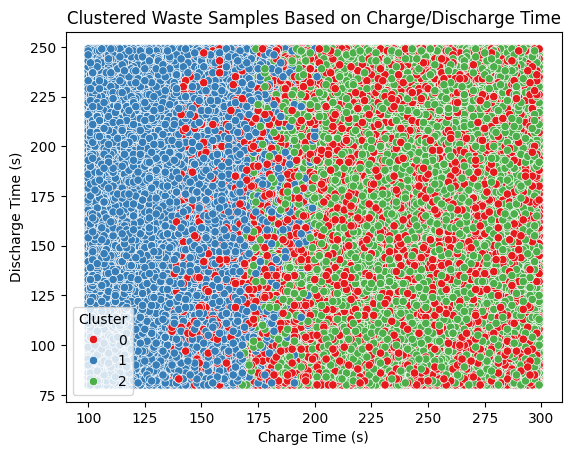

In [16]:
sns.scatterplot(data=df, x='Charge Time (s)', y='Discharge Time (s)', hue='Cluster', palette='Set1')
plt.title("Clustered Waste Samples Based on Charge/Discharge Time")
plt.show()


In [17]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Load your dataset
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")  # Update if file name differs

# Start Dash app
app = dash.Dash(__name__)
app.title = "Agri-Waste Energy Dashboard"

# App layout
app.layout = html.Div([
    html.H1("Agri-Waste Energy Storage Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        html.Label("Select Waste Type:"),
        dcc.Dropdown(
            id='waste-dropdown',
            options=[{'label': wt, 'value': wt} for wt in df['Waste Type'].unique()],
            value=df['Waste Type'].unique()[0]
        ),
    ], style={'width': '40%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Voltage Range:"),
        dcc.RangeSlider(
            id='voltage-slider',
            min=df['Voltage (V)'].min(),
            max=df['Voltage (V)'].max(),
            value=[df['Voltage (V)'].min(), df['Voltage (V)'].max()],
            marks={round(v, 2): str(round(v, 2)) for v in sorted(df['Voltage (V)'].unique())}
        )
    ], style={'marginTop': 30}),

    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='scatter-plot')
])
# Callback for interactivity
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('scatter-plot', 'figure')],
    [Input('waste-dropdown', 'value'),
     Input('voltage-slider', 'value')]
)
def update_graphs(selected_waste, voltage_range):
    filtered_df = df[(df['Waste Type'] == selected_waste) &
                     (df['Voltage (V)'] >= voltage_range[0]) &
                     (df['Voltage (V)'] <= voltage_range[1])]
    
    bar_fig = px.bar(filtered_df,
                     x='Carbonization Time (hrs)',
                     y=['Charge Time (s)', 'Discharge Time (s)'],
                     barmode='group',
                     title=f'Charge/Discharge Time - {selected_waste}')
    
    scatter_fig = px.scatter(filtered_df,
                             x='Charge Time (s)',
                             y='Discharge Time (s)',
                             color='Voltage (V)',
                             title=f'Charge vs Discharge Time - {selected_waste}')
    
    return bar_fig, scatter_fig


In [18]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Load your dataset
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")  # double `.csv` – is this a typo?

# Initialize the Dash app
app = dash.Dash(__name__)
app.title = "Agri-Waste Energy Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Agri-Waste Energy Storage Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Waste Type:"),
        dcc.Dropdown(
            id='waste-dropdown',
            options=[{'label': wt, 'value': wt} for wt in df['Waste Type'].unique()],
            value=df['Waste Type'].unique()[0]
        ),
    ], style={'width': '40%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Voltage Range:"),
        dcc.RangeSlider(
            id='voltage-slider',
            min=df['Voltage (V)'].min(),
            max=df['Voltage (V)'].max(),
            step=0.1,
            value=[df['Voltage (V)'].min(), df['Voltage (V)'].max()],
            marks={round(v, 1): str(round(v, 1)) for v in sorted(df['Voltage (V)'].unique())[:50]}  # Limit to 50 for speed
        )
    ], style={'marginTop': 30, 'marginBottom': 30}),

    dcc.Graph(id='bar-chart')
])

# Callback
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('waste-dropdown', 'value'),
     Input('voltage-slider', 'value')]
)
def update_graph(selected_waste, voltage_range):
    filtered_data = df[
        (df['Waste Type'] == selected_waste) &
        (df['Voltage (V)'] >= voltage_range[0]) &
        (df['Voltage (V)'] <= voltage_range[1])
    ]

    if filtered_data.empty:
        return px.bar(title="No Data Found for Selected Filters")

    grouped = filtered_data.groupby('Carbonization Time (hrs)')[['Charge Time (s)', 'Discharge Time (s)']].sum().reset_index()

    grouped_melted = grouped.melt(id_vars='Carbonization Time (hrs)', var_name='variable', value_name='value')

    fig = px.bar(
        grouped_melted,
        x='Carbonization Time (hrs)',
        y='value',
        color='variable',
        barmode='group',
        title=f"Charge/Discharge Time - {selected_waste}"
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Load your dataset
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")  # Update filename if needed

# Step 2: Select important columns
X = df[['Voltage (V)', 'Charge Time (s)', 'Discharge Time (s)']]
y = df['Waste Type']

# Step 3: Normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 6: Recommendation Function
def recommend_waste(voltage, charge_time, discharge_time):
    input_df = pd.DataFrame([[voltage, charge_time, discharge_time]],
                            columns=['Voltage (V)', 'Charge Time (s)', 'Discharge Time (s)'])
    input_scaled = scaler.transform(input_df)
    neighbors = knn.kneighbors(input_scaled, return_distance=False)
    neighbor_types = y_train.iloc[neighbors[0]].tolist()
    recommended_type = Counter(neighbor_types).most_common(1)[0][0]
    return recommended_type, neighbor_types


# 🔍 Example Usage:
voltage = 0.95
charge = 200
discharge = 150

recommended, neighbors_used = recommend_waste(voltage, charge, discharge)
print(f"🔋 Recommended Waste Type: {recommended}")
print(f"🧑‍🤝‍🧑 Neighboring Waste Samples: {neighbors_used}")


🔋 Recommended Waste Type: Corn Husk
🧑‍🤝‍🧑 Neighboring Waste Samples: ['Corn Husk', 'Corn Husk', 'Orange Peel', 'Corn Husk', 'Rice Husk']


In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
import dash
from dash import html, dcc, Input, Output

# Load dataset
df = pd.read_csv("large_synthetic_agri_waste_energy.csv.csv")
X = df[['Voltage (V)', 'Charge Time (s)', 'Discharge Time (s)']]
y = df['Waste Type']

# Normalize input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train kNN model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Dash App
app = dash.Dash(__name__)
app.title = "Agri-Waste Recommendation"

app.layout = html.Div([
    html.H1("Waste Type Recommender", style={"textAlign": "center"}),

    html.Div([
        html.Label("Voltage (V):"),
        dcc.Slider(
            id='voltage',
            min=round(df['Voltage (V)'].min(), 2),
            max=round(df['Voltage (V)'].max(), 2),
            step=0.01,
            value=0.95,
            marks={i: str(i) for i in range(int(df['Voltage (V)'].min()), int(df['Voltage (V)'].max()) + 1)}
        ),

        html.Label("Charge Time (s):"),
        dcc.Input(id='charge', type='number', value=200),

        html.Label("Discharge Time (s):"),
        dcc.Input(id='discharge', type='number', value=150),
    ], style={'padding': 20, 'maxWidth': '500px'}),

    html.Div(id='output-container', style={'marginTop': 30, 'fontSize': 18})
])

@app.callback(
    Output('output-container', 'children'),
    [Input('voltage', 'value'),
     Input('charge', 'value'),
     Input('discharge', 'value')]
)
def update_output(voltage, charge, discharge):
    input_df = pd.DataFrame([[voltage, charge, discharge]],
                            columns=['Voltage (V)', 'Charge Time (s)', 'Discharge Time (s)'])
    input_scaled = scaler.transform(input_df)
    neighbors = knn.kneighbors(input_scaled, return_distance=False)
    neighbor_types = y_train.iloc[neighbors[0]].tolist()
    recommended_type = Counter(neighbor_types).most_common(1)[0][0]
    return f"\U0001F50B Recommended Waste Type: {recommended_type} | Nearest Samples: {neighbor_types}"

if __name__ == '__main__':
    app.run(debug=True)


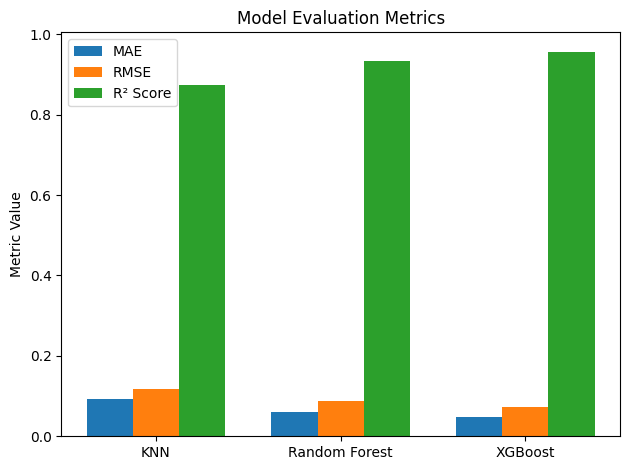

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['KNN', 'Random Forest', 'XGBoost']
mae = [0.092, 0.061, 0.049]
rmse = [0.118, 0.089, 0.072]
r2 = [0.875, 0.934, 0.957]

# Plot
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, mae, width, label='MAE')
bars2 = ax.bar(x, rmse, width, label='RMSE')
bars3 = ax.bar(x + width, r2, width, label='R² Score')

# Labels and Titles
ax.set_ylabel('Metric Value')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()
